In [191]:
import csv
import numpy as np
import matplotlib.pyplot as plt
data_cap_1=[]
with open("cap33n.csv", 'r') as file:
    csvreader = csv.reader(file)
    for row in csvreader:
        data_cap_1.append(row)

data_cap_1_sorted=np.zeros(shape=(len(data_cap_1),4))

        
for tindex in range(len(data_cap_1)):
    data_cap_1_sorted[tindex]=float(data_cap_1[tindex][0]),float(data_cap_1[tindex][1]),float(data_cap_1[tindex][2]),float(data_cap_1[tindex][3])
    #print(data_cap_1_sorted[tindex])

In [192]:
x=data_cap_1_sorted[:,0]
y=data_cap_1_sorted[:,1]-data_cap_1_sorted[:,3]

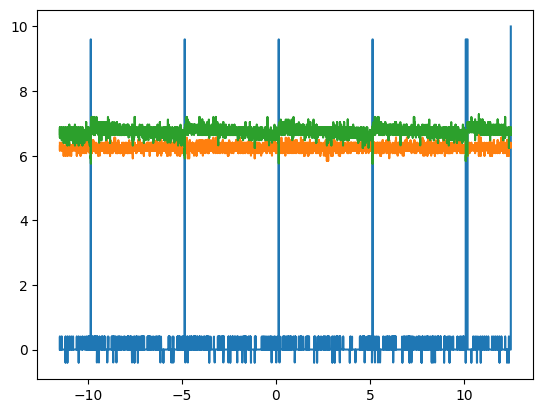

In [193]:
plt.plot(data_cap_1_sorted[:,0],data_cap_1_sorted[:,2])
plt.plot(data_cap_1_sorted[:,0],data_cap_1_sorted[:,3]*100)
plt.plot(data_cap_1_sorted[:,0],data_cap_1_sorted[:,1]*100)

In [161]:
#y_dash=sgn.savgol_filter(data_cap_1_sorted[2396:4256,1]-data_cap_1_sorted[2396:4256,3],20,0)

In [162]:
#plt.plot(data_cap_1_sorted[2396:4256,0],y_dash)


In [163]:
#os = signal.butter(10, 15, 'hp', fs=1000, output='sos')
#filtered = signal.sosfilt(sos, sig)
#plt.plot(t, filtered)
#plt.axis([0, 1, -2, 2])
#plt.set_xlabel('Time [seconds]')
#plt.tight_layout()
#plt.show()

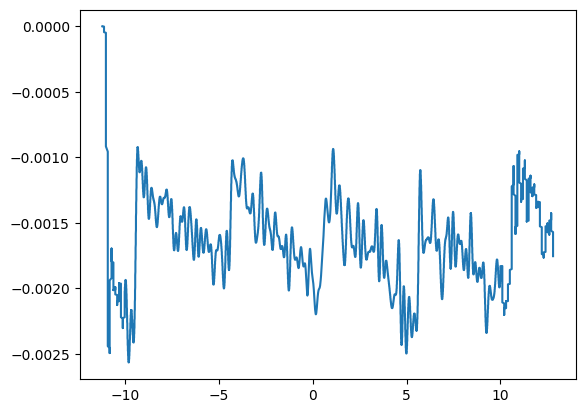

In [190]:
import scipy.signal as sgn
sos = sgn.butter(10, 10, 'lp', fs=1000, output='sos')
y_filtered = sgn.sosfilt(sos,y )
plt.plot(x, y_filtered)
plt.show()

5310
6804


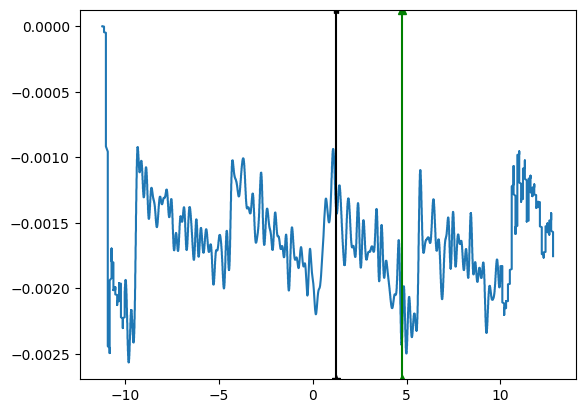

In [173]:
plt.plot(x,y_filtered)
#plt.xlim(-8.5,0.1)

x_start=np.where(abs(x-1.25)<10**-3)
x_start=x_start[0][0]
print(x_start)
plt.axvline(x=x[x_start],color='k',marker='*')
x_end=np.where(abs(x-4.75)<10**-10)
x_end=x_end[0][0]
print(x_end)
plt.axvline(x=x[x_end],color='g',marker='^')


#plt.plot(data_cap_1_sorted[:,0],data_cap_1_sorted[:,1])

In [75]:
from scipy.optimize import curve_fit

In [88]:
def line(x,m,c):
    return x*m+c

In [174]:
x_limited=x[x_start:x_end]
y_filtered_limited=y_filtered[x_start:x_end]

In [175]:
m_c,variance=curve_fit(line, x_limited, y_filtered_limited)#bounds=(0, [3., 1., 0.5]))

In [ ]:
#slopes=[]

In [176]:
print(m_c)
print(variance)

[-0.00017337 -0.00118574]
[[ 1.75997331e-11 -5.27112009e-11]
 [-5.27112009e-11  1.75852340e-10]]


In [177]:

slopes.append((140,m_c[0],m_c[1],variance[0][0],variance[1][1]))

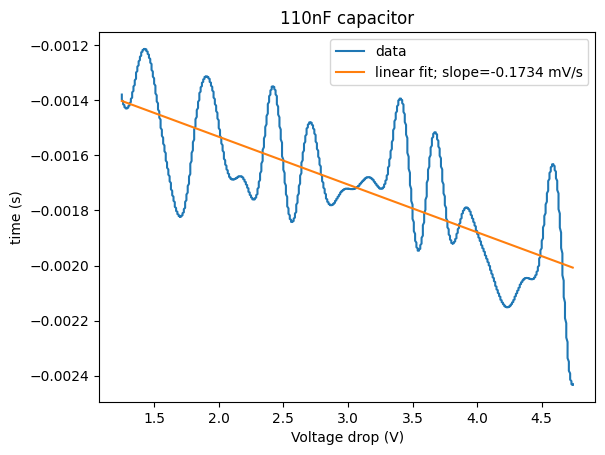

In [178]:
plt.plot(x_limited,y_filtered_limited,label="data")
plt.plot(x_limited,line(x_limited,m_c[0],m_c[1]),label=f"linear fit; slope={np.round(m_c[0]*1000,4)} mV/s")
plt.title("110nF capacitor")
plt.xlabel("Voltage drop (V)")
plt.ylabel("time (s)")
plt.legend()
#plt.savefig('cap_100n.png')
#plt.text(f"slope= {m_c[0]} V/s",y_filtered_limited[50],0.5)

In [133]:
temp=slopes[-1]
slopes[-1]=slopes[0]
slopes[0]=temp

In [137]:
np.flip(slopes[:])

array([[ 1.35318572e-11,  5.66165785e-13, -4.65092009e-03,
        -5.45452548e-04,  3.30000000e+01],
       [ 8.17219109e-12,  3.62720030e-13, -1.15376480e-02,
        -1.24326685e-03,  1.50000000e+01],
       [ 3.05188867e-12,  3.93337253e-13, -5.12034459e-03,
        -8.52498136e-04,  2.20000000e+01],
       [ 1.35318572e-11,  5.66165785e-13, -4.65092009e-03,
        -5.45452548e-04,  3.30000000e+01]])

In [184]:
slopes=np.array(slopes)
print(slopes)
with open('new_caps.csv', 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile, delimiter=',')
    for index_temp in range(0,len(slopes)):
        csvwriter.writerow(slopes[index_temp])
csvfile.close()

[[ 1.00000000e+01 -1.90467972e-03  2.78042465e-02  1.12083037e-11
   8.12144591e-11]
 [ 2.00000000e+01 -8.86433895e-04  1.41993031e-02  6.44869187e-12
   1.41402685e-10]
 [ 3.30000000e+01 -5.58443037e-04  6.39033318e-03  5.21240902e-12
   4.71761646e-11]
 [ 6.60000000e+01 -3.00155110e-04  1.88088305e-03  9.32886253e-12
   7.80779595e-11]
 [ 7.60000000e+01 -3.07353324e-04  1.38199973e-03  7.26345056e-12
   6.23024253e-11]
 [ 8.60000000e+01 -2.24773604e-04  6.85883124e-04  7.85700469e-12
   1.43165793e-10]
 [ 9.60000000e+01 -2.44759842e-04  1.09935711e-03  7.59659333e-12
   2.04532365e-10]
 [ 1.10000000e+02 -2.24338112e-04  9.05703236e-04  6.05002039e-12
   2.54604259e-10]
 [ 1.40000000e+02 -1.73371906e-04 -1.18573614e-03  1.75997331e-11
   1.75852340e-10]]


Text(0.5, 1.0, 'Voltage drop rates vs Capacitances')

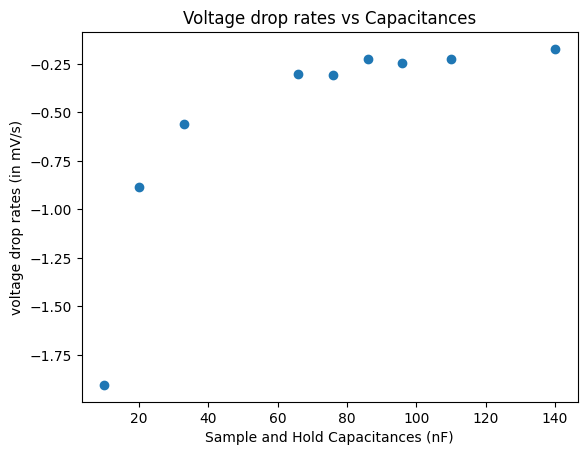

In [182]:
plt.errorbar(slopes[:,0],slopes[:,1]*1000,xerr=np.sqrt(slopes[:,3])*1000,fmt='o')
plt.ylabel("voltage drop rates (in mV/s)")
plt.xlabel("Sample and Hold Capacitances (nF)")
plt.title("Voltage drop rates vs Capacitances")

In [109]:
np.mean(data_cap_1_sorted[:,3])

0.06987818359375

In [117]:
np.mean(data_cap_1_sorted[:,3])


0.06975386718750001

In [118]:
resistances=[]


In [ ]:
r = 0.0698 *(1/slope*c)

In [123]:
resistances=np.zeros(shape=(len(slopes),))
for index in range(len(slopes)):
    resistances[index]=0.0698*1/((slopes[index][0]*10**-9 )* abs(slopes[index][1])) 

In [128]:
print(resistances)

[3.87779198e+09 3.72168236e+09 3.74282747e+09 3.82980146e+09]


In [125]:
parasitic_resistance=np.mean(resistances)

In [127]:
print(parasitic_resistance*10**-6,"MHz")

3793.0258169482554 MHz


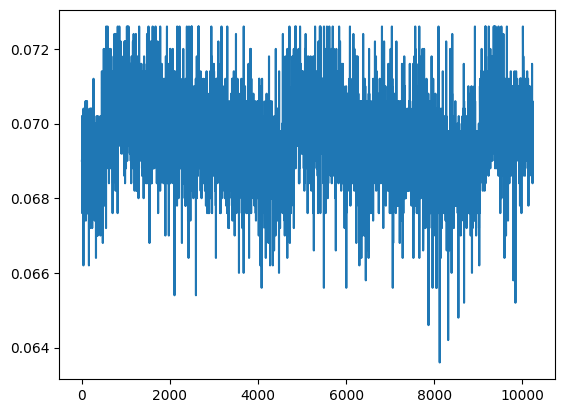

In [112]:
np.mean(data_cap_1_sorted[:,3])

In [306]:
#import numpy as np
#from scipy import signal
#import matplotlib.pyplot as plt
#t = np.linspace(0, 1, 500)
#plt.plot(t, signal.sawtooth(-2 * np.pi * 5 * t))

In [127]:
np.max(y[x_index_start:x_index_end])

NameError: name 'x_index_start' is not defined

In [256]:
print(slopes)

[(100, array([-0.00018266,  0.00015397]), array([[ 3.96002149e-13, -7.80106599e-13],
       [-7.80106599e-13,  4.17935228e-12]])), (15, array([-0.00124247, -0.01154106]), array([[4.99499550e-13, 1.76252315e-12],
       [1.76252315e-12, 8.85315149e-12]])), (22, array([-0.00085263, -0.00512014]), array([[5.70857146e-13, 8.58978596e-13],
       [8.58978596e-13, 4.33663867e-12]])), (33, array([-0.00054545, -0.00465092]), array([[5.66165785e-13, 2.38656049e-12],
       [2.38656049e-12, 1.35318572e-11]]))]


In [280]:
temp=np.zeros(shape=(4,))
cov=np.zeros(shape=(4,))
for index in (0,1,2,3):
    t=slopes[index]
    temp[index]=t[1][0]
    cov[index]=t[2][0][0]

In [281]:
temp

array([-0.00018266, -0.00124247, -0.00085263, -0.00054545])

In [282]:
caps=[100,15,22,33]

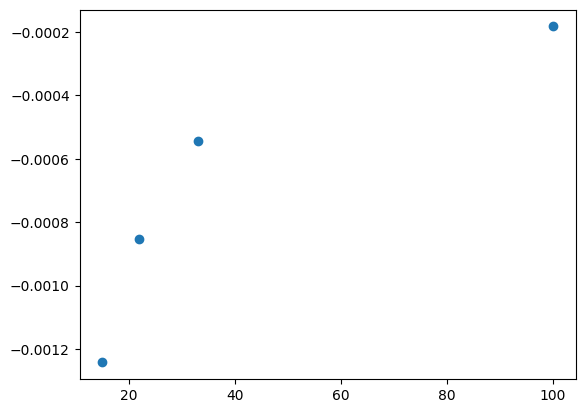

In [285]:
plt.scatter(caps,temp)

In [153]:
1.2445*15

18.6675

In [154]:
0.5446*33

17.971799999999998

In [157]:
0.1823*100

18.23

In [150]:
x_index_temp[0][0]

7346

In [156]:
x=data_cap_1_sorted[:,0]
x_index_end=np.where(x==4)[0][0]
x_index_start=np.where(x==-3.5)[0][0]
print(x_index_end)
print(x_index_start)
#a=np.argmax(y[]`)
#b=np.argmin(y)

7132
3932


In [173]:
min_=np.where(y==np.min(y[x_index_start:x_index_end]))
max_=np.where(y==np.max(y[x_index_start:x_index_end]))
print(min_)
print(max_)

(array([6588], dtype=int64),)
(array([6660], dtype=int64),)


In [175]:
x[min_]

array([2.72])

In [159]:
y[max_:min_]

array([], dtype=float64)

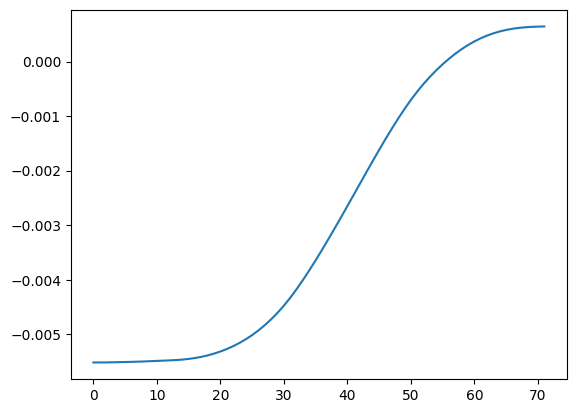

In [137]:
plt.plot(y[b:a])


In [107]:

max_=max(y)
min_=min(y)
peak_to_peak=max_-min_
#print(peak_to_peak)
#temp=[]
for iter_ in range(len(y)-1):
    temp.append(abs(y[iter_+1]-y[iter_]))
    if(y[iter_+1]>y[iter_] + 0.0003 ):
        print(iter_)
    

-12.7


(array([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
          11, 2341, 2342, 2343, 2344, 2345, 2346, 2347, 2348, 2349, 2350,
        2351, 2352, 2353, 2354, 2355, 2356, 2357, 2358, 2359, 2360, 2361,
        2362, 2363, 2364, 2365, 2366, 2367, 2368, 2369, 2370, 2371, 2372,
        2373, 2374, 2375, 2376, 2377, 2378, 2379, 2380, 2381, 2382, 4453,
        4454, 4455, 4456, 4457, 4458, 6606, 6607, 6608, 6609, 6610, 6611,
        6612, 6613, 6614, 6615, 6616, 6617, 6618, 6619, 6620, 6621, 6622,
        6623, 6624, 6625, 6626, 6627, 6628, 6629, 6630, 6631, 6632, 6633,
        6634, 6635, 6636, 6637, 6638, 6639, 6640, 6641, 6642, 6643, 6644,
        6645, 6646, 6647, 6648, 6649, 6650, 6651], dtype=int64),)